In [1]:
#STUDENT DETAILS

# FULL NAME: SHIVANGI GUPTA
# USC ID:8972835473

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
import numpy as np
import math
from sklearn.metrics import classification_report, confusion_matrix 

In [3]:
#Read Data and change class labels
features=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","grade_of_spondylolisthesis","class_label"]
Vertebral_Column_Data=pd.read_csv("./vertebral_column_data/column_2C.dat",sep=" ",names=features)
Vertebral_Column_Data["class_label"]=Vertebral_Column_Data["class_label"].replace("AB",1)
Vertebral_Column_Data["class_label"]=Vertebral_Column_Data["class_label"].replace("NO",0)
Data_AB=Vertebral_Column_Data[Vertebral_Column_Data.class_label==1]
Data_NO=Vertebral_Column_Data[Vertebral_Column_Data.class_label==0]
lowest_training_error=[]
#print(Vertebral_Column_Data)

In [4]:
#scatter plot
def draw_scatter_plot():
    for i in range(0,6):
        for j in range(i+1,6):
            xlabel=features[i]
            ylabel=features[j]
            AB=plt.scatter(Data_AB.iloc[:,i:i+1],Data_AB.iloc[:,j:j+1],c="red",marker="+")
            NO=plt.scatter(Data_NO.iloc[:,i:i+1],Data_NO.iloc[:,j:j+1],c="blue",marker=".")
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.legend((AB,NO),("AB","NO"))
            plt.show()


In [5]:
# boxplot
def set_colors_boxplot(bp):
    plt.xticks([1, 2], ['Normal','Abnormal'])
    plt.setp(bp['boxes'][0], color='blue')
    plt.setp(bp['boxes'][1], color='red')
    plt.setp(bp['caps'][0], color='blue')
    plt.setp(bp['caps'][1], color='blue')
    plt.setp(bp['caps'][2], color='red')
    plt.setp(bp['caps'][3], color='red')
    plt.setp(bp['whiskers'][0], color='blue')
    plt.setp(bp['whiskers'][1], color='blue')
    plt.setp(bp['whiskers'][2], color='red')
    plt.setp(bp['whiskers'][3], color='red')
    plt.setp(bp['medians'][0], color='blue')
    plt.setp(bp['medians'][1], color='red')                
def draw_boxplot():
    for i in range(0,6):
            feature_data=[]
            feature_data.append(Data_NO[features[i]])
            feature_data.append(Data_AB[features[i]])
            #print(feature_data)
            bp=plt.boxplot(feature_data)
            set_colors_boxplot(bp)
            plt.title(features[i])
            plt.legend([bp["boxes"][1], bp["boxes"][0]], ['AB', 'NO'])
            plt.show()
        

In [6]:
# divinding data into training and test data
train_data_AB=Data_AB.iloc[0:140,:]
train_data_NO=Data_NO.iloc[0:70,:]
test_data_AB=Data_AB.iloc[140:,:]
test_data_NO=Data_NO.iloc[70:,:]
train_features=pd.concat([train_data_AB.iloc[:,0:6],train_data_NO.iloc[:,0:6]])
train_labels=pd.concat([train_data_AB.iloc[:,6:],train_data_NO.iloc[:,6:]])
test_features=pd.concat([test_data_AB.iloc[:,0:6],test_data_NO.iloc[:,0:6]])
test_labels=pd.concat([test_data_AB.iloc[:,6:],test_data_NO.iloc[:,6:]])

In [7]:
# KNN MODEL
def knn_classifier():
    train_features=pd.concat([train_data_AB.iloc[:,0:6],train_data_NO.iloc[:,0:6]])
    train_labels=pd.concat([train_data_AB.iloc[:,6:],train_data_NO.iloc[:,6:]])
    test_features=pd.concat([test_data_AB.iloc[:,0:6],test_data_NO.iloc[:,0:6]])
    test_labels=pd.concat([test_data_AB.iloc[:,6:],test_data_NO.iloc[:,6:]])
    test_error=[]
    train_error=[]
    k_values=[]
    for k in range(208,0,-3):
        classifier=KNeighborsClassifier(n_neighbors=k)
        classifier.fit(train_features,np.ravel(train_labels))
        pred_labels_test=classifier.predict(test_features)
        pred_labels_train=classifier.predict(train_features)
        test_error.append(np.mean(pred_labels_test!=np.ravel(test_labels)))
        train_error.append(np.mean(pred_labels_train!=np.ravel(train_labels)))
        lowest_training_error.append(np.mean(pred_labels_train!=np.ravel(train_labels)))
        k_values.append(k)
    dict_test_k={"K Value":k_values[test_error.index(min(test_error))],"Test Error":min(test_error)}
    result=conf_mat_val(dict_test_k["K Value"])
    dict_test_k.update({"True Positive Rate":result[1]})
    dict_test_k.update({"True Negative Rate":result[2]})
    dict_test_k.update({"Precision":result[3]})
    dict_test_k.update({"F-Score":result[4]})
    dict_train_k={"K Value":k_values[train_error.index(min(train_error))],"Train Error":min(train_error)}
    plt.plot(range(208,0,-3),test_error,c="red",label="Test Error")
    plt.plot(range(208,0,-3),train_error,c="blue",label="Train Error")
    plt.xlim(208,0)
    plt.xlabel("k")
    plt.ylabel("Error Rate")
    plt.legend()
    plt.show()
    print(pd.DataFrame(result[0],index=['NO', 'AB'], columns=['NO', 'AB']))
    return [dict_test_k,dict_train_k]
def print_best_knn(dict_best_k):
    best_k=pd.DataFrame(dict_best_k,index=[0])
    return best_k

In [8]:

def conf_mat_val(k):
    train_features=pd.concat([train_data_AB.iloc[:,0:6],train_data_NO.iloc[:,0:6]])
    train_labels=pd.concat([train_data_AB.iloc[:,6:],train_data_NO.iloc[:,6:]])
    test_features=pd.concat([test_data_AB.iloc[:,0:6],test_data_NO.iloc[:,0:6]])
    test_labels=pd.concat([test_data_AB.iloc[:,6:],test_data_NO.iloc[:,6:]])
    result=[]
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_features,np.ravel(train_labels))
    pred_labels_test=classifier.predict(test_features)
    cm=confusion_matrix(test_labels,pred_labels_test)
    true_positive_rate=(cm[1][1]/(cm[1][0]+cm[1][1]))
    true_negative_rate=(cm[0][0]/(cm[0][0]+cm[0][1]))
    precision=(cm[1][1]/(cm[0][1]+cm[1][1]))
    f_score=(true_positive_rate+precision)/2
    result.append(cm)
    result.append(true_positive_rate)
    result.append(true_negative_rate)
    result.append(precision)
    result.append(f_score)
    return result

In [9]:
# different training set size
#train_features=pd.concat([train_data_AB.iloc[:,0:6],train_data_NO.iloc[:,0:6]])
#train_labels=pd.concat([train_data_AB.iloc[:,6:],train_data_NO.iloc[:,6:]])
#test_features=pd.concat([test_data_AB.iloc[:,0:6],test_data_NO.iloc[:,0:6]])
#test_labels=pd.concat([test_data_AB.iloc[:,6:],test_data_NO.iloc[:,6:]])
def learning_curve():
    test_error_rate_withn=[]
    dict_n_k={}
    for n in range(10,211,10):
        temp=math.floor(n/3)
        test_error_rate=[]
        train_features_subset=pd.concat([train_data_AB.iloc[0:n-temp+1,0:6],train_data_NO.iloc[0:temp+1,0:6]])
        train_labels_subset=pd.concat([train_data_AB.iloc[0:n-temp+1,6:],train_data_NO.iloc[0:temp+1,6:]])
        dict_test_k={}
        k_values=[]
        for k in range(1,n+1,5):
            k_values.append(k)
            classifier=KNeighborsClassifier(n_neighbors=k)
            classifier.fit(train_features_subset,np.ravel(train_labels_subset))
            pred_labels_subset=classifier.predict(test_features)
            test_error_rate.append(np.mean(pred_labels_subset!=np.ravel(test_labels)));
        test_error_rate_withn.append(min(test_error_rate));
        dict_test_k={"K Value":k_values[test_error_rate.index(min(test_error_rate))],"Test Error":min(test_error_rate)}
        dict_n_k.update({n:dict_test_k})
    plt.plot(range(10,211,10),test_error_rate_withn)
    plt.xlabel("N")
    plt.ylabel("Test Error Rate")
    plt.title("Learning Curve")
    plt.show()
    return dict_n_k
    
        
    

In [10]:
# Manhattan
def knn_manhattan_dist():
    test_error_manhattan=[]
    dict_manhattan_k={}
    result={}
    for k in range(1,197,5):
        classifier=KNeighborsClassifier(n_neighbors=k,p=1)
        classifier.fit(train_features,np.ravel(train_labels))
        pred_labels_test=classifier.predict(test_features)
        test_error_manhattan.append(np.mean(pred_labels_test!=np.ravel(test_labels)))
        dict_manhattan_k.update({k:np.mean(pred_labels_test!=np.ravel(test_labels))})
        pred_labels_train=classifier.predict(train_features)
        lowest_training_error.append(np.mean(pred_labels_train!=np.ravel(train_labels)))
    key_min = min(dict_manhattan_k.keys(), key=(lambda k: dict_manhattan_k[k]))
    result.update({"K Value":key_min,"Test Error":dict_manhattan_k[key_min]});
    return result

In [11]:
def knn_logp():
    test_error_manhattan_log=[]
    x=[]
    dict_logp={}
    result={}
    for i in np.arange(0.1,1.1,0.1):
        #print(math.floor(math.pow(10,i)))
        x.append(i)
        classifier=KNeighborsClassifier(n_neighbors=6,p=round(math.pow(10,i)))
        classifier.fit(train_features,np.ravel(train_labels))
        pred_labels_test=classifier.predict(test_features)
        test_error_manhattan_log.append(np.mean(pred_labels_test!=np.ravel(test_labels)))
        dict_logp.update({i:np.mean(pred_labels_test!=np.ravel(test_labels))})
    #print(min(test_error_manhattan_log))
    #print(np.arange(0.1,1.1,1))
    #plt.plot(x,test_error_manhattan_log)
    #plt.show()
    key_min = min(dict_logp.keys(), key=(lambda k: dict_logp[k]))
    result.update({"log(p) Value":key_min,"Test Error":dict_logp[key_min]});
    return result
    #print(min(train_error))

In [12]:
# Mahalonobis
def knn_mahalonobis_dist():
    test_error_mahalonobis=[]
    dict_mahalonobis_k={}
    result={}
    for k in range(1,197,5):
        classifier=KNeighborsClassifier(n_neighbors=k,algorithm='brute', metric='mahalanobis',metric_params={'V': np.cov(train_features)})
        classifier.fit(train_features,np.ravel(train_labels))
        pred_labels_test=classifier.predict(test_features)
        test_error_mahalonobis.append(np.mean(pred_labels_test!=np.ravel(test_labels)))
        #print(str(k)+":"+str(np.mean(pred_labels_test!=np.ravel(test_labels))))
        dict_mahalonobis_k.update({k:np.mean(pred_labels_test!=np.ravel(test_labels))})
        pred_labels_train=classifier.predict(train_features)
        lowest_training_error.append(np.mean(pred_labels_train!=np.ravel(train_labels)))
    key_min = min(dict_mahalonobis_k.keys(), key=(lambda k: dict_mahalonobis_k[k]))
    result.update({"K Value":key_min,"Test Error":dict_mahalonobis_k[key_min]});
    return result


In [13]:
#chebyshev distance
def knn_chebyshev_dist():
    test_error_chebyshev=[]
    dict_chebyshev_k={}
    result={}
    for k in range(1,197,5):
        classifier=KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
        classifier.fit(train_features,np.ravel(train_labels))
        pred_labels_test=classifier.predict(test_features)
        test_error_chebyshev.append(np.mean(pred_labels_test!=np.ravel(test_labels)))
        dict_chebyshev_k.update({k:np.mean(pred_labels_test!=np.ravel(test_labels))})
        pred_labels_train=classifier.predict(train_features)
        lowest_training_error.append(np.mean(pred_labels_train!=np.ravel(train_labels)))
    key_min = min(dict_chebyshev_k.keys(), key=(lambda k: dict_chebyshev_k[k]))
    result.update({"K Value":key_min,"Test Error":dict_chebyshev_k[key_min]});
    return result
#print(min(test_error_chebyshev))

In [14]:
def knn_weighted_classification():
    test_error_weight1=[]
    test_error_weight2=[]
    test_error_weight3=[]
    dict_wght_chebyshev_k={}
    dict_wght_euclidean_k={}
    dict_wght_manhattan_k={}
    result={}
    for k in range(1,197,5):
        classifier=KNeighborsClassifier(n_neighbors=k,metric='chebyshev',weights='distance')
        classifier.fit(train_features,np.ravel(train_labels))
        pred_labels_test=classifier.predict(test_features)
        #print(str(k)+":"+str(np.mean(pred_labels_test!=np.ravel(test_labels))))
        test_error_weight1.append(np.mean(pred_labels_test!=np.ravel(test_labels)))
        dict_wght_chebyshev_k.update({k:np.mean(pred_labels_test!=np.ravel(test_labels))})
        pred_labels_train=classifier.predict(train_features)
        lowest_training_error.append(np.mean(pred_labels_train!=np.ravel(train_labels)))

        classifier1=KNeighborsClassifier(n_neighbors=k,weights='distance')
        classifier1.fit(train_features,np.ravel(train_labels))
        pred_labels_test=classifier1.predict(test_features)
        test_error_weight2.append(np.mean(pred_labels_test!=np.ravel(test_labels)))
        dict_wght_euclidean_k.update({k:np.mean(pred_labels_test!=np.ravel(test_labels))})
        #print(str(k)+":"+str(np.mean(pred_labels_test!=np.ravel(test_labels))))
        pred_labels_train=classifier1.predict(train_features)
        lowest_training_error.append(np.mean(pred_labels_train!=np.ravel(train_labels)))

        classifier2=KNeighborsClassifier(n_neighbors=k,weights='distance',p=1)
        classifier2.fit(train_features,np.ravel(train_labels))
        pred_labels_test=classifier2.predict(test_features)
        test_error_weight3.append(np.mean(pred_labels_test!=np.ravel(test_labels)))
        dict_wght_manhattan_k.update({k:np.mean(pred_labels_test!=np.ravel(test_labels))})
        #print(str(k)+":"+str(np.mean(pred_labels_test!=np.ravel(test_labels))))
        pred_labels_train=classifier2.predict(train_features)
        lowest_training_error.append(np.mean(pred_labels_train!=np.ravel(train_labels)))
        
    key_min = min(dict_wght_chebyshev_k.keys(), key=(lambda k: dict_wght_chebyshev_k[k]))
    result.update({"chebyshev":{"K Value":key_min,"Test Error":dict_wght_chebyshev_k[key_min]}});
    key_min = min(dict_wght_euclidean_k.keys(), key=(lambda k: dict_wght_euclidean_k[k]))
    result.update({"euclidean":{"K Value":key_min,"Test Error":dict_wght_euclidean_k[key_min]}});
    key_min = min(dict_wght_manhattan_k.keys(), key=(lambda k: dict_wght_manhattan_k[k]))
    result.update({"manhattan":{"K Value":key_min,"Test Error":dict_wght_manhattan_k[key_min]}});
    return result

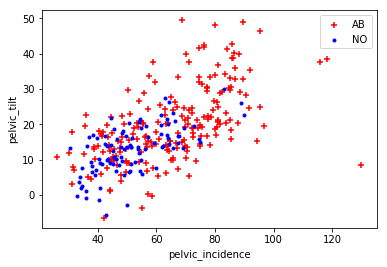

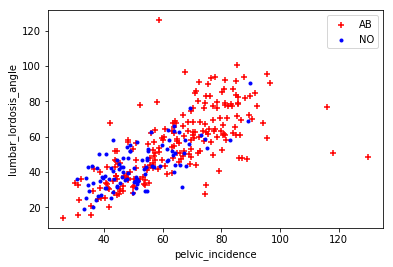

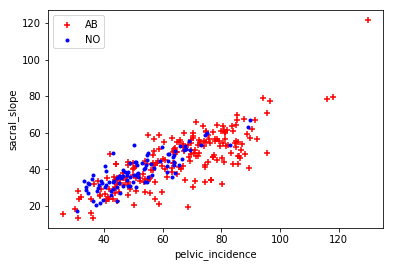

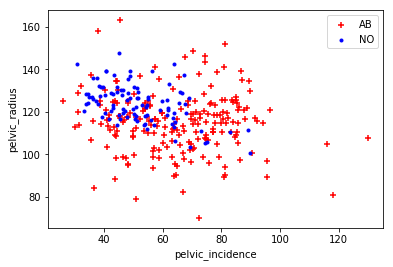

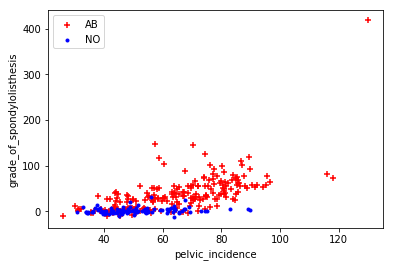

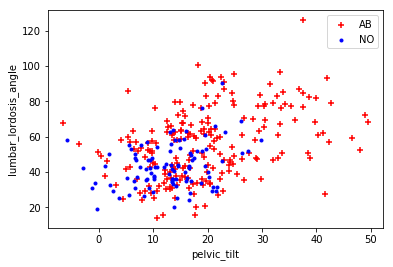

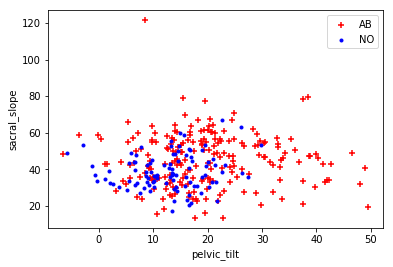

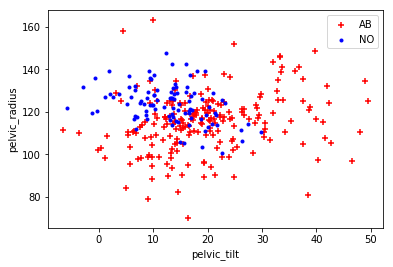

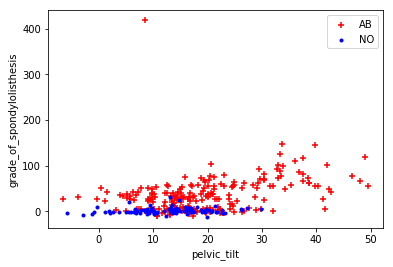

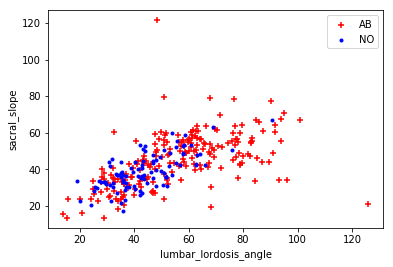

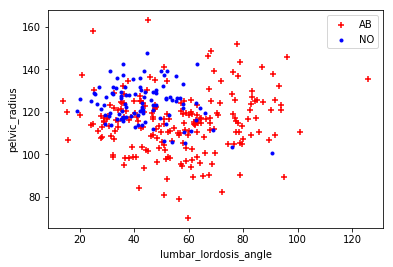

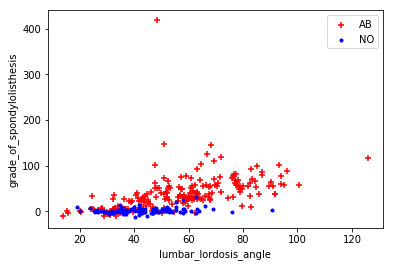

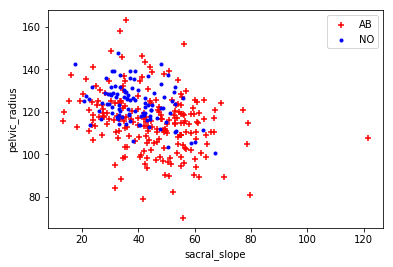

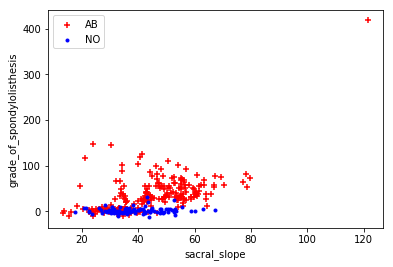

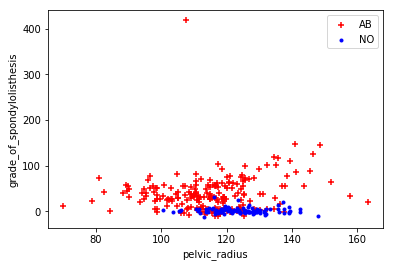

In [15]:
#calling functions made for each part mentioned in the assignment here

#drawing scatter plots between each pair of independent variables
#1b(i)
draw_scatter_plot()

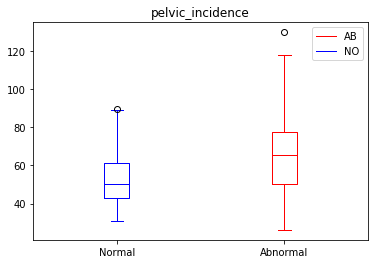

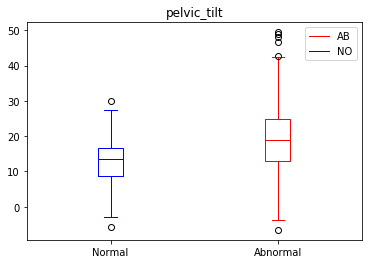

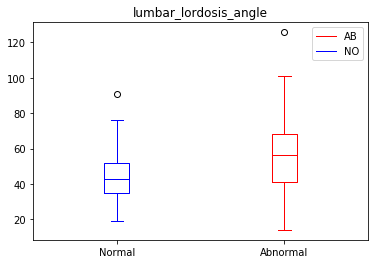

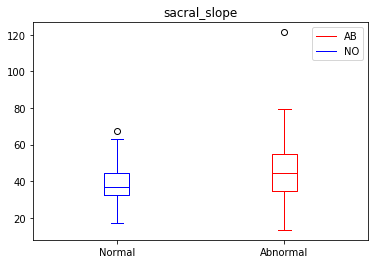

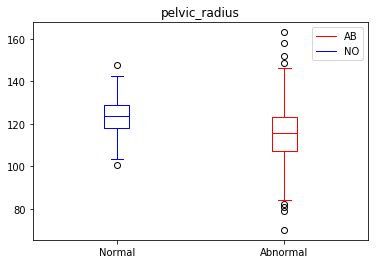

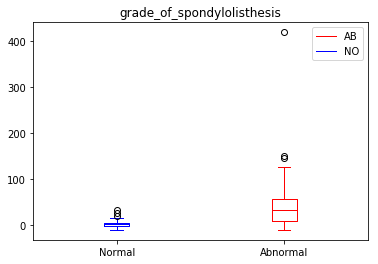

In [16]:
#drawing boxplots for each independent variable for both labels
#1b(ii)
draw_boxplot()

In [17]:
#dividing data into train and test data
#1b(iii)
train_data_AB=Data_AB.iloc[0:140,:]
train_data_NO=Data_NO.iloc[0:70,:]
test_data_AB=Data_AB.iloc[140:,:]
test_data_NO=Data_NO.iloc[70:,:]
#pd.concat([train_data_AB,train_data_NO])
#pd.concat([test_data_AB,test_data_NO])

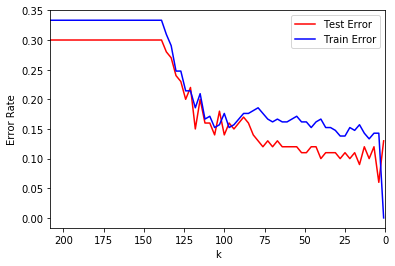

    NO  AB
NO  25   5
AB   1  69


,K Value,Test Error,True Positive Rate,True Negative Rate,Precision,F-Score
TEST DATA,4,0.06,0.985714,0.833333,0.932432,0.959073


In [18]:
#knn classifier to predict train and test error for different values of k and plotting them
# Also calculating confusion matrix and TN,TP,precision and f-score for best k in test data
#1c(i) and 1c(ii) for test data
result=knn_classifier()
test_err=print_best_knn(result[0])
test_err.rename(index = {0: "TEST DATA"},inplace="true")
test_err

In [19]:
# best k table for train data
#1c(i) and #1c(ii) for train data
train_err=print_best_knn(result[1])
train_err.rename(index = {0: "TRAIN DATA"},inplace="true")
train_err

,K Value,Train Error
TRAIN DATA,1,0.0


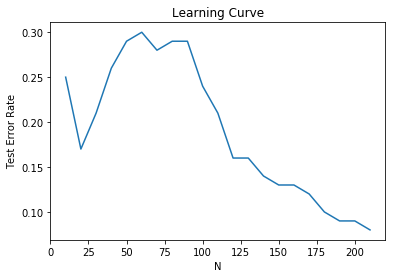

,K Value,Test Error
10,1.0,0.25
20,6.0,0.17
30,1.0,0.21
40,16.0,0.26
50,21.0,0.29
60,31.0,0.30
70,26.0,0.28
80,31.0,0.29
90,41.0,0.29
100,6.0,0.24


In [20]:
# plotting test error for different train data set
#1c(iii)
res=learning_curve()
pd.DataFrame(res).T

In [21]:
# Summarization of best k values for manhattan,mahalonobis and chebyshev metrics using majority pooling
#1d(i)A,1d(i)C,1d(ii)
res=pd.DataFrame(knn_manhattan_dist(),index=[0])
res1=pd.DataFrame(knn_mahalonobis_dist(),index=[0])
res2=pd.DataFrame(knn_chebyshev_dist(),index=[0])
final=pd.concat([res,res1,res2],ignore_index=True)
final.rename(index = {0: "MANHATTAN MAJORITY POOLING",1:"MAHALONOBIS MAJORITY POOLING",2:"CHEBYSHEV MAJORITY POOLING"},inplace = True) 
final



,K Value,Test Error
MANHATTAN MAJORITY POOLING,6,0.11
MAHALONOBIS MAJORITY POOLING,6,0.16
CHEBYSHEV MAJORITY POOLING,16,0.08


In [22]:
#best log p value when using manhattan metric
#1d(i)B
res=pd.DataFrame(knn_logp(),index=[0])
res.rename(index = {0: "FOR BEST K MANHATTAN"},inplace="true")
res

,log(p) Value,Test Error
FOR BEST K MANHATTAN,0.6,0.06


In [23]:
# Summarization of best k values for manhattan,euclidean and chebyshev metrics using weighted decision
#1e
res=knn_weighted_classification()
final=pd.concat([pd.DataFrame(res["chebyshev"],index=[0]),pd.DataFrame(res["euclidean"],index=[0]),pd.DataFrame(res["manhattan"],index=[0])],ignore_index=True)
final.rename(index = {0: "CHEBYSHEV WEIGHTED",1:"EUCLIDEAN WEIGHTED",2:"MANHATTAN WEIGHTED"},inplace = True)
final

,K Value,Test Error
CHEBYSHEV WEIGHTED,16,0.11
EUCLIDEAN WEIGHTED,6,0.10
MANHATTAN WEIGHTED,26,0.10


In [24]:
#lowest training error achieved in the complete homework
#1f
print("The lowest training error achieved in the homework "+str(min(lowest_training_error)))

# Explanation: as in knn we also include the point for which we are calcuting the nearest neighbor
#so for k=1 the training error rate is 0.0
#which is the lowest

The lowest training error achieved in the homework 0.0
